In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True,random_state=42, stratify=y)

In [6]:
clf_lr = LogisticRegression(penalty="l2",random_state=42, solver='liblinear')
clf_lr.fit(X_train, y_train)

print("LOGISTIC REGRESSION:")
print()
train_score = accuracy_score(y_train, clf_lr.predict(X_train))
print("Train accuracy:   %0.5f" % train_score)

pred = clf_lr.predict(X_test)
    
score = accuracy_score(y_test, pred)
print("Test accuracy:   %0.5f" % score)

print("classification report:")
print(classification_report(y_test, pred))

print("confusion matrix:")
print(confusion_matrix(y_test, pred))

LOGISTIC REGRESSION:

Train accuracy:   0.96588
Test accuracy:   0.94149
classification report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        70
           1       0.93      0.98      0.95       118

    accuracy                           0.94       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188

confusion matrix:
[[ 61   9]
 [  2 116]]


In [7]:
clf_nb = MultinomialNB(alpha=1.5)
clf_nb.fit(X_train, y_train)

print("MULTINOMIAL NAIVE BAYES:")
print()
train_score = accuracy_score(y_train, clf_nb.predict(X_train))
print("Train accuracy:   %0.5f" % train_score)

pred = clf_nb.predict(X_test)
    
score = accuracy_score(y_test, pred)
print("Test accuracy:   %0.5f" % score)

print("classification report:")
print(classification_report(y_test, pred))

print("confusion matrix:")
print(confusion_matrix(y_test, pred))

MULTINOMIAL NAIVE BAYES:

Train accuracy:   0.89239
Test accuracy:   0.89894
classification report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        70
           1       0.88      0.97      0.92       118

    accuracy                           0.90       188
   macro avg       0.91      0.88      0.89       188
weighted avg       0.90      0.90      0.90       188

confusion matrix:
[[ 55  15]
 [  4 114]]


In [8]:
train_size_pass = [0.2,0.4,0.6,0.8,1.0]

train_sizes_lg, train_scores_lg, validation_scores_lg = learning_curve(estimator = clf_lr,
                                                              X = X_train,y = y_train, train_sizes = train_size_pass, 
                                                              cv = 5,n_jobs=-1,scoring = 'neg_mean_squared_error')

train_sizes_nb, train_scores_nb, validation_scores_nb = learning_curve(estimator = clf_nb,
                                                              X = X_train,y = y_train, train_sizes = train_size_pass, 
                                                              cv = 5,n_jobs=-1,scoring = 'neg_mean_squared_error')

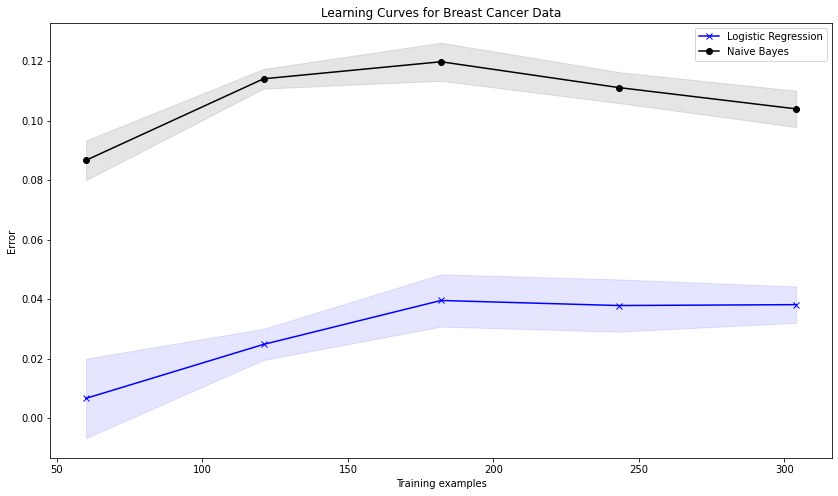

In [16]:
#if axes is None:
_, axes = plt.subplots(1, 1, figsize=(14, 8))

axes.set_title("Learning Curves for Breast Cancer Data")
#if ylim is not None:
#    axes[0].set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Error")

train_scores_mean_lg = -train_scores_lg.mean(axis = 1)
train_scores_mean_nb = -train_scores_nb.mean(axis = 1)


#train_scores_mean_lg = np.mean(train_scores_lg, axis=1)
train_scores_std_lg = np.std(-train_scores_lg, axis=1)
#train_scores_mean_nb = np.mean(train_scores_nb, axis=1)
train_scores_std_nb = np.std(-train_scores_nb, axis=1)
#test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)



# Plot learning curve
#axes[0].grid()
axes.fill_between(train_sizes_lg, train_scores_mean_lg - train_scores_std_lg,
                     train_scores_mean_lg + train_scores_std_lg, alpha=0.1,
                     color="b")
axes.fill_between(train_sizes_nb, train_scores_mean_nb - train_scores_std_nb,
                     train_scores_mean_nb + train_scores_std_nb, alpha=0.1,
                     color="black")
axes.plot(train_sizes_lg, train_scores_mean_lg, 'x-', color="b",
             label="Logistic Regression")
axes.plot(train_sizes_nb, train_scores_mean_nb, 'o-', color="black",
             label="Naive Bayes")
axes.legend(loc="best")